In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
register(
    id= 'FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery' : False}   
)
env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n,env.action_space.n])
dis = .99

[2018-07-04 14:58:17,427] Making new env: FrozenLake-v3


In [6]:
num_episodes = 20000
rList=[]

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False 
    # E Greedy
    # e = 1. / ((i // 100) + 1)
    while not done:
        # E Greedy
        if np.random.rand(1) < e :
            action = env.action_space.sample()
        else :
            action = np.argmax(Q[state,:])
        
        # Random Noise
        #action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i +1))
        
        new_state, reward, done,_ = env.step(action)
        Q[state,action] = reward + dis * np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)


Success rate :0.94775
Final Q-Table values
[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.92274469 0.93206535]
 [0.93206535 0.         0.         0.        ]
 [0.92274469 0.         0.         0.        ]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.92274469]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


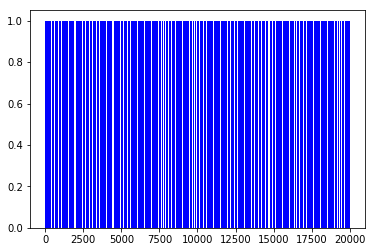

In [7]:
print("Success rate :" + str(sum(rList)/num_episodes))
print("Final Q-Table values")
print(Q)
plt.bar(range(len(rList)), rList,color='blue')
plt.show()

In [ ]:
np.random.rand?